In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Collecting the data set from Kaggle

In [2]:
df=pd.read_csv("C:\\Users\\sheli\\Desktop\\Data Analyst Project resume\\Rough\\netflix_titles.csv",encoding='unicode_escape')

In [3]:
print (df.head()) #printing first 5 rows

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
print (df.columns) #printing the column names

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [5]:
print (df.shape) #printing the no of rows and columns in the file

(8807, 12)


In [6]:
print (df.dtypes) #printing the data types

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [7]:
df['date_added']=pd.to_datetime(df['date_added'])# converting the mentioned field into date dtype

In [8]:
print (df.dtypes) #rechecking

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [9]:
print (df['date_added'])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]


# Dealing with Null Values

In [10]:
print (df.isnull().sum()) #count on null values present in per columns

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


### We can handle Null Values in three different ways (replace method,fillna method, or dropna(drop rows) method)
### Here we are using fillna method to replace null values

In [11]:
df['director'].fillna(method='ffill',inplace=True)

In [12]:
print (df['director'].isnull().sum()) 

0


In [13]:
df['cast'].fillna(method='bfill',inplace=True)

In [14]:
print (df['cast'].isnull().sum())

0


In [15]:
df['country'].fillna(method='ffill',inplace=True)

In [16]:
print (df['country'].isnull().sum())

0


In [17]:
print (df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


In [18]:
df['duration'].replace(np.NaN,'90 min', inplace=True)

In [19]:
print (df.duplicated().sum()) #checking duplicate values

0


In [20]:
df[(df['director']=="Louis C.K.") & (df["type"]=="Movie") & (df['cast']=="Louis C.K.")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,90 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,90 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,90 min,Movies,The comic puts his trademark hilarious/thought...


In [21]:
df[(df['director']=="Louis C.K.") & (df["type"]=="Movie") & (df['cast']=="Louis C.K.")]['rating']

5541    74 min
5794    84 min
5813    66 min
Name: rating, dtype: object

In [22]:
df.loc[df['cast']=="Louis C.K.", 'rating']='PG-13'

In [23]:
df[(df['director']=="Louis C.K.") & (df["type"]=="Movie") & (df['cast']=="Louis C.K.")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,PG-13,90 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,PG-13,90 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,PG-13,90 min,Movies,The comic puts his trademark hilarious/thought...


In [24]:
df['rating'].fillna(method='ffill',inplace=True)

# Exploratory Data Analysis using Python Pandas library and Matplotlib

## 1.Content Release on Netflix in Years vs Count

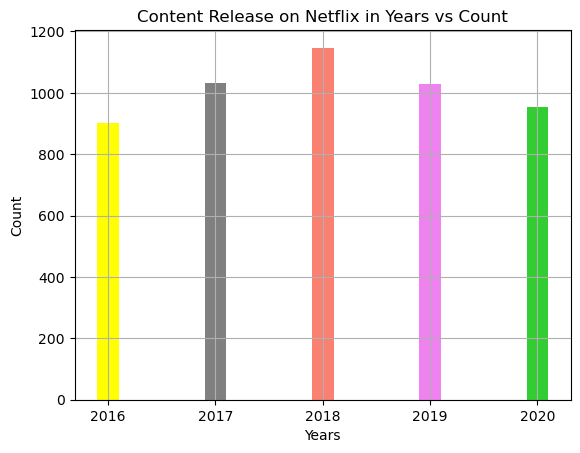

In [25]:
years=df.groupby(['release_year'],as_index=False)
Year_vs_Release=years['release_year'].value_counts().sort_values(by='count', ascending=False).head(5)
#print (Year_vs_Release)
#print (Year_vs_Release['release_year'].dtypes)
Year=Year_vs_Release['release_year'].to_list()
#print (Year)
count=Year_vs_Release['count'].to_list()
#print (count)

colors=['salmon','gray','violet','limegreen','yellow']
plt.bar(Year,count, width=0.2,color=colors)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Content Release on Netflix in Years vs Count")
plt.grid()
plt.show()

#### 2018,2017,2019,2020,2016 are the Top 5 years contributed to Content Release on Netflix

## 2.Find out the Top 5 Years contributed to content release on Netflix and also find out the counts on TV Shows & Movies using Matplotlib

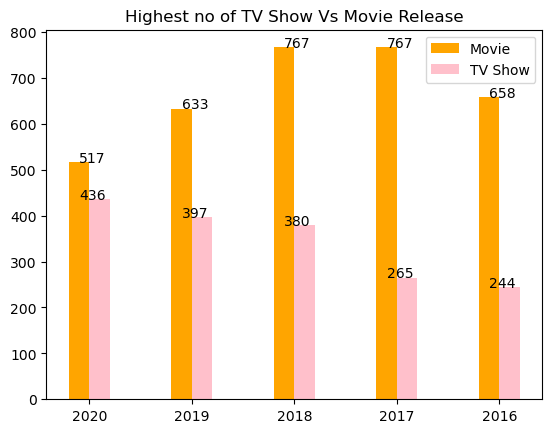

In [27]:
Data=df.groupby(['release_year','type'],as_index=False) #using groupby function on columns
Year_vs_Release=Data['release_year'].value_counts().sort_values(by='count', ascending=False)
#print (Year_vs_Release)

Moviedetails=Year_vs_Release[Year_vs_Release.where(Year_vs_Release['type']=='Movie',other=0).all(1)].head(5)
#print (Moviedetails)
Movie=Moviedetails[Moviedetails['release_year'].isin([2016,2017,2018,2019,2020])].sort_values(by='release_year',ascending=False)
#print (Moviedetails['release_year'].sort_values(by='release_year',ascending=True))
year1=Movie['release_year'].head(5).to_list()
#print (year1)
type1=Movie['type'].head(5).to_list()
#print (type1)
count1=Movie['count'].head(5).to_list()
#print (count1)

#From the 1st figure we can clearly conclude that 2018,2017,2019,2020,2016 are the top 5 years that have contributed in content release.
#& also to plot a bar graph we must use same datas
Show=Year_vs_Release[Year_vs_Release.where(Year_vs_Release['type']=='TV Show',other=0).all(1).to_list()]
TVShow=Show[Show['release_year'].isin([2016,2017,2018,2019,2020])]
year2=TVShow['release_year'].to_list()
#print (year2)
type2=TVShow['type'].to_list()
#print (type2)
count2=TVShow['count'].to_list()
#print (count2)


x=np.arange(len(year1))
#print (x)
w=0.2
plt.bar(x,count1,w,color='orange',label='Movie')
plt.bar(x+0.2,count2,w,color='pink',label='TV Show')
plt.legend()
plt.xticks(x+w/2,year1)
plt.title("Highest no of TV Show Vs Movie Release")
for i,v in enumerate(count1):
    plt.text (i,v,str(v))
for j,v in enumerate(count2):
    plt.text (j,v,str(v))
plt.show()

#### On the year 2018 highest number of Movie & on 2019 highest number of TV Show was released

## 3.Calculate the total percentage of individual contents that are present on Netflix Dataset

[6131, 2676]


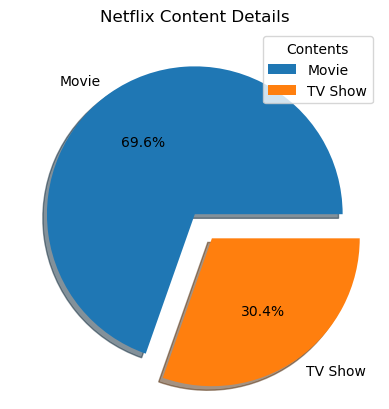

In [34]:
Shows=df['type'].value_counts().to_list()
print (Shows)

myexplode=[0,0.2]
plt.pie(Shows,labels=["Movie","TV Show"],explode=myexplode,shadow=True,autopct='%2.1f%%')
plt.legend(loc='upper right',title="Contents")
plt.title ("Netflix Content Details")
plt.show()

####  Netflix contains highest number of Movies than TV Shows

## 4.Top 10 Directors who gave the Movies and TV Shows to Netflix

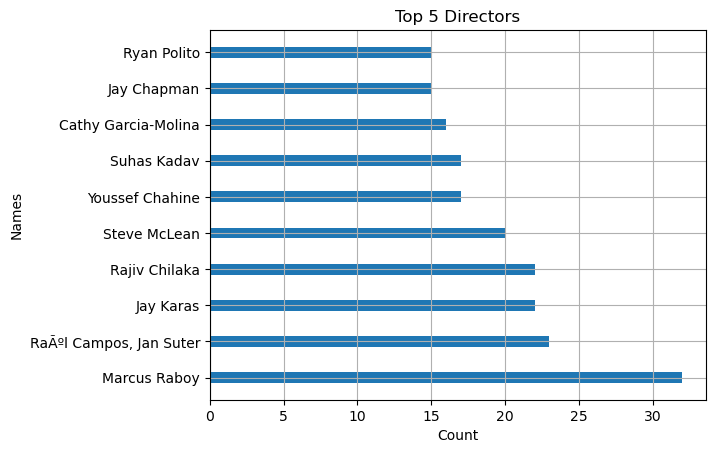

In [35]:
Director=df['director'].value_counts().head(10)
#print (Director)
Names=Director.index.to_list()
#print (Names)
count=Director.to_list()
#print (count)


plt.barh(Names,count,height=0.3)
plt.ylabel("Names")
plt.xlabel("Count")
plt.title("Top 5 Directors")
plt.grid()
plt.show()

#### Marcus Raboy is the leading Director who contributed a lot of Movie

## 5.Top 5 Genres of Movies and TV shows available on netflix

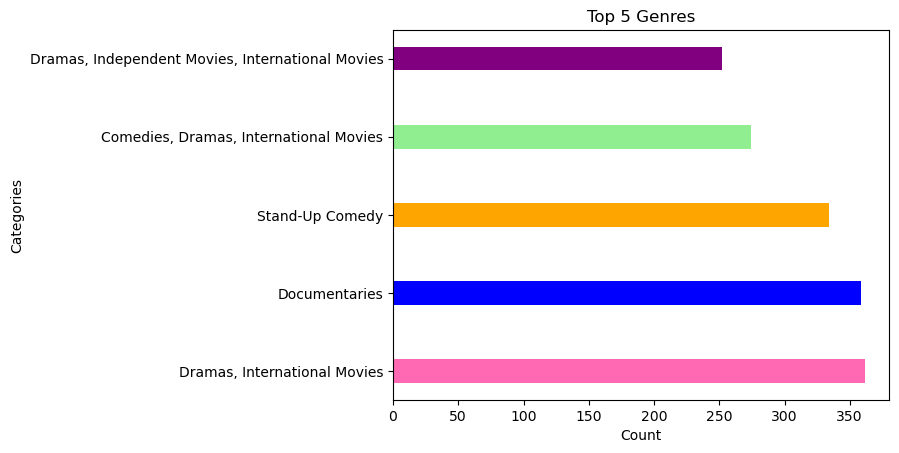

In [36]:
Categories=df['listed_in'].value_counts().head(5)
CategoryNames=Categories.index.to_list()
CategoryCount=Categories.to_list()
colors=['hotpink','blue','orange','lightgreen','purple']

plt.barh(CategoryNames,CategoryCount,height=0.3,color=colors)
plt.title("Top 5 Genres")
plt.ylabel("Categories")
plt.xlabel("Count")
plt.show()

#### International Movies, Dramas are the most popular Genres on Netflix.

## 6. Top 5 Cast in Netflix

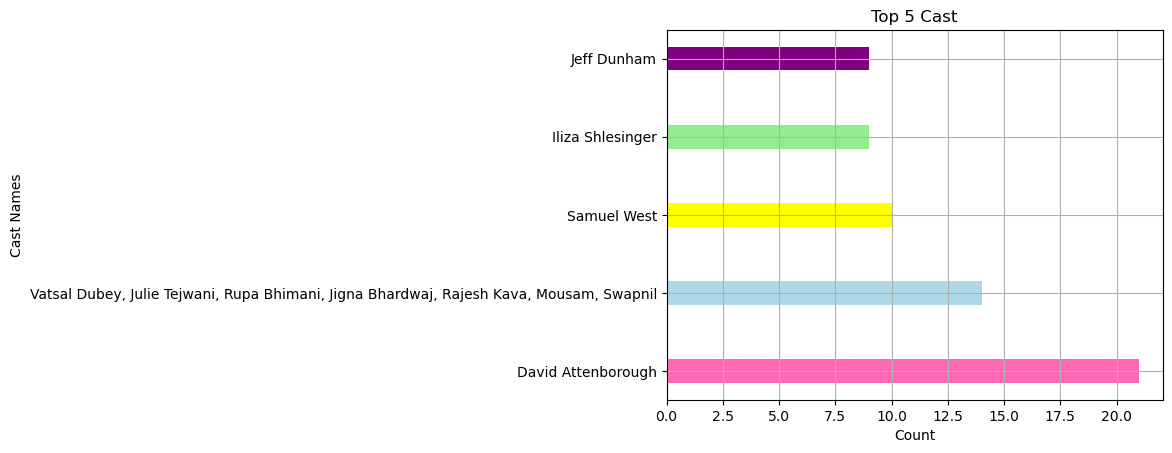

In [38]:
cast=df['cast'].value_counts().head()
#print (cast)
Movie=cast.index.to_list()
#print (Movie)
count=cast.to_list()
#print (count)
colors=['hotpink','lightblue','yellow','lightgreen','purple']

plt.barh(Movie,count,height=0.3,color=colors)
plt.xlabel("Count")
plt.ylabel("Cast Names")
plt.title("Top 5 Cast")
plt.grid()
plt.show()

#### David Attenborough is the leading Cast

## 7.Top 5 Countries which gave highest number of Movies and TV Shows to Netflix

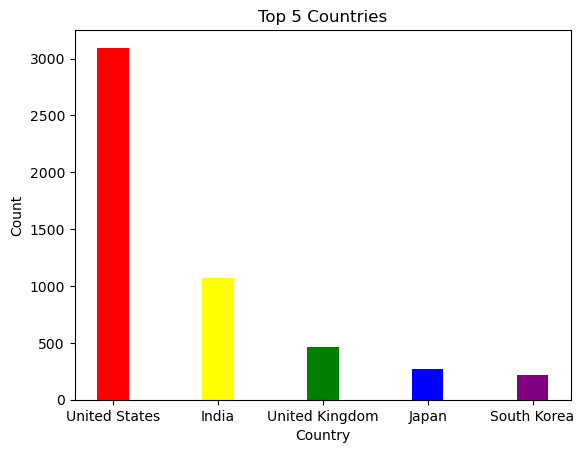

In [39]:
Countries=df['country'].value_counts().head(5)
#print (Countries)
Country=Countries.index.to_list()
#print (Country)
Count=Countries.to_list()
#print (Count)
plt.bar(Country,Count,width=0.3,color=['red','yellow','green','blue','purple'])
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 5 Countries")
plt.show()

#### Most of the contents on Netflix was produced by United States and India.

## 8.Top 10 Countries producing Movies on Netflix

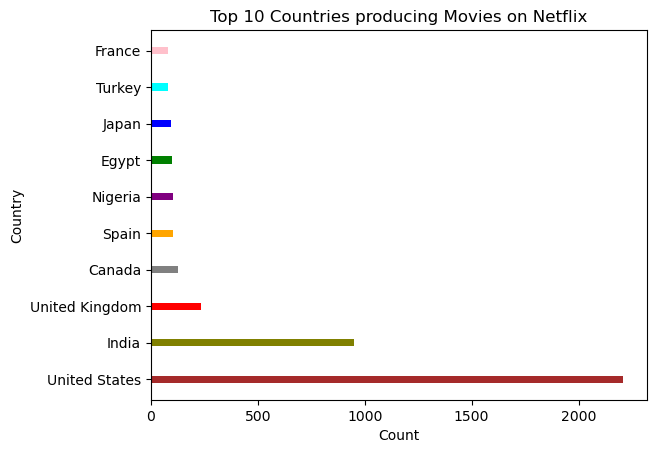

In [40]:
Data=df.groupby(['country','type'],as_index=False)
Countries=Data['country'].value_counts().sort_values(by='count',ascending=False)
#print (Countries)

Movie=Countries[Countries.where(Countries['type']=='Movie',other=0).all(1)].head(10)
#print(Movie)
Country=Movie['country'].to_list()
#print (Country)
MovieCount=Movie['count'].to_list()
#print (Count21)
colors=['brown','olive','red','gray','orange','purple','green','blue','cyan','pink']

plt.barh (Country,MovieCount,height=0.2,color=colors)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Countries producing Movies on Netflix")
plt.show()

#### United States & India is the leading Country producing Movies on Netflix

## 9.Top 10 Countries producing TV Shows on Netflix

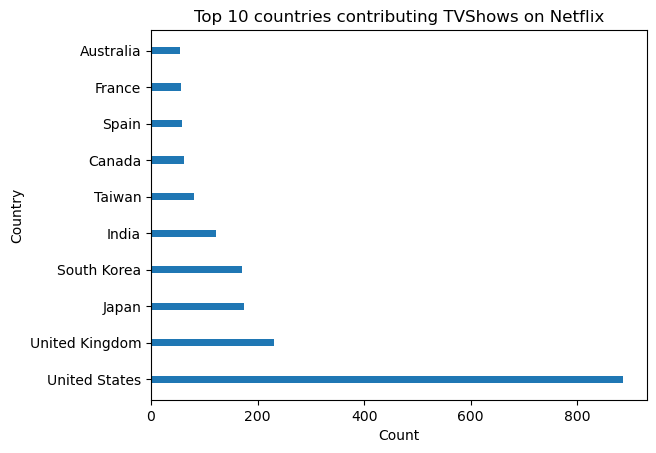

In [41]:
TVShows=Countries[Countries.where(Countries['type']=='TV Show',other=0).all(1)].head(10)
#print(TVShows)
Country=TVShows['country'].to_list()
#print (Country)
TVShowsCount=TVShows['count'].to_list()
#print (TVShowsCount)

plt.barh(Country,TVShowsCount,height=0.2)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 countries contributing TVShows on Netflix")
plt.show()

#### US & UK is the leading Country producing Movies on Netflix

## 10. Major Ratings in Netflix

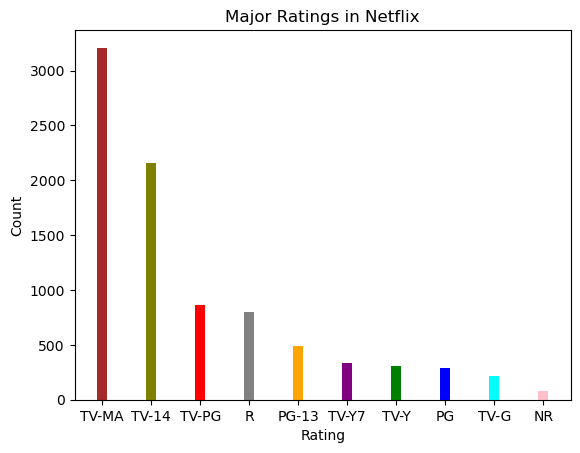

In [42]:
NetflixRating=df['rating'].value_counts().head(10)
Rating=NetflixRating.index.to_list()
#print (Rating)
RatingCount=NetflixRating.to_list()
#print (RatingCount)
colors=['brown','olive','red','gray','orange','purple','green','blue','cyan','pink']

plt.bar(Rating,RatingCount, width=0.2,color=colors)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Major Ratings in Netflix")
plt.show()

#### Most of the shows has got  TV-MA & TV-14 as ratings

## Conclusion:-
We have performed a lot of Operations on Netflix Data Set to gather usefull insight.

Netflix contains more number of Movies(69.6%) than TVShow(30.4%).
Most of the contents on Netflix was produced by United States and India.
David Attenborough is the leading Cast & 
Marcus Raboy is the leading Director who contributed a lot of Movies and TV Shows on Netflix.
On 2018 Netflix released highest number of  Movies having a count of 767.
On 2019 Netflix released highest number of TV Shows with a count of 397.
International Movies, Dramas are the most popular Genres on Netflix.